# Mapping invariant manifolds


### (0) Import the usual, plus scipy package for solving initial value problems

In [2]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la
import scipy.integrate as int

# Define nonlinear map and its inverse

Here, we'll be working with autonomous two-dimensional nonlinear maps in the $(x_1,x_2)$ plane:

$$
{x_1(n+1)} = f(x_1(n),x_2(n)) \\
{x_2(n+1)} = g(x_1(n),x_2(n))
$$


We'll also define its inverse:

$$
{x_1(n)} = f^{inv}(x_1(n+1),x_2(n+1)) \\
{x_2(n)} = g^{inv}(x_1(n+1),x_2(n+1))
$$


In [8]:
pi = np.pi

In [9]:
fp = (1/2,1)

In [12]:
def f_fun(x1,x2):
    f= (x1 + x2 - 1/(2*pi) * np.sin(2*pi*x1)) % 1;
    return f

def g_fun(x1,x2):
    g= x2 - 1/(2*pi) * np.sin(2*pi*x1);
    return g


Double check it is working:

In [11]:
print(f_fun(1/2,1) == 0.5, g_fun(1/2,1) == 1)

True True


In [13]:
def f_inv_fun(x1,x2):
    f_inv = (x1 - x2) % 1#(f_fun(x1,x2) - g_fun(x1,x2)) % 1
    return f_inv

def g_inv_fun(x1,x2):
    g_inv= x2 + 1/(2*pi) * np.sin(2*pi*(x1 - x2))#g_fun(x1,x2) + 1/(2*pi)*np.sin(2*pi*(f_fun(x1,x2) - g_fun(x1,x2)))
    return g_inv


## Enter Jacobian and compute eigenvectors

In [5]:
A_mat=np.array([[2 ,1],[1 , 1]])
print(A_mat)

l, v = la.eig(A_mat)

np.set_printoptions(precision=3, suppress=True)
print('eigenvalue 1-D array=',l)
print('eigenvector 2_D array')
print(v)

[[2 1]
 [1 1]]
eigenvalue 1-D array= [2.618+0.j 0.382+0.j]
eigenvector 2_D array
[[ 0.851 -0.526]
 [ 0.526  0.851]]


In [6]:
slope_1 = v[1,0]/v[0,0]
print(slope_1)  # in this case, for unstable eigenvector

slope_2 = v[1,1]/v[0,1]
print(slope_2)  # in this case, for stable eigenvector

0.6180339887498948
-1.6180339887498951


## Set up arrays of initial conditions, along stable and unstable eigenvectors

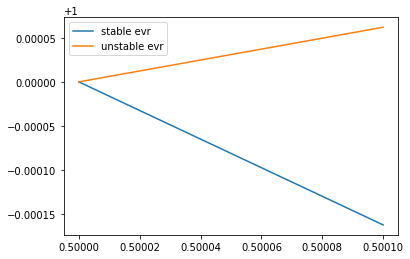

In [10]:
num_ics=20000

#make a line of initial conditions, via x2 = m x1 + b
m = slope_2

x1_ic_stable_list=np.linspace(0, .0001, num_ics) + 0.5
x2_ic_stable_list=m*(x1_ic_stable_list - fp[0]) + fp[1]



#make a line of initial conditions, via x2 = m x1 + b
m = slope_1

x1_ic_unstable_list=np.linspace(0, .0001, num_ics) + 0.5
x2_ic_unstable_list=m*(x1_ic_unstable_list - fp[0]) + fp[1]

plt.figure()
plt.plot(x1_ic_stable_list,x2_ic_stable_list,label="stable evr")
plt.plot(x1_ic_unstable_list,x2_ic_unstable_list,label="unstable evr")

plt.legend()

### Iterate intial conditions along stable manifold backward in time ... and intial conditions along unstable manifold forward in time


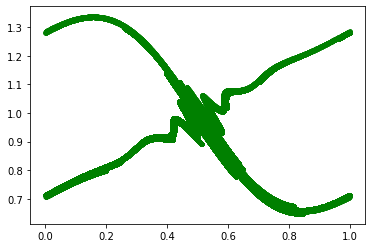

In [14]:
num_iterations=22
x1_stable_array=np.zeros([x1_ic_stable_list.shape[0],num_iterations])
x2_stable_array=np.zeros(x1_stable_array.shape)
#x1_unstable_array=np.zeros([x1_ic_unstable_list.shape[0],num_iterations])
#x2_unstable_array=np.zeros(x1_unstable_array.shape)

for ic in np.arange(num_ics):
    x1_stable_array[ic,0]=x1_ic_stable_list[ic]
    x2_stable_array[ic,0]=x2_ic_stable_list[ic]
    #x1_unstable_array[ic,0]=x1_ic_unstable_list[ic]
    #x2_unstable_array[ic,0]=x2_ic_unstable_list[ic]
    
    for n in np.arange(num_iterations-1):    
        x1_stable_array[ic,n+1]=f_inv_fun(x1_stable_array[ic,n],x2_stable_array[ic,n])
        x2_stable_array[ic,n+1]=g_inv_fun(x1_stable_array[ic,n],x2_stable_array[ic,n])
        #x1_unstable_array[ic,n+1]=f_fun(x1_unstable_array[ic,n],x2_unstable_array[ic,n])
        #x2_unstable_array[ic,n+1]=g_fun(x1_unstable_array[ic,n],x2_unstable_array[ic,n])

plt.figure()
for n in np.arange(num_iterations):    
    plt.plot(x1_stable_array[:,n],x2_stable_array[:,n],'.',color='green',label="stable manif.")
    #plt.plot(x1_unstable_array[:,n],x2_unstable_array[:,n],'.',color='blue',label="unstable manif.")
plt.show()

Look at the unstable manifold

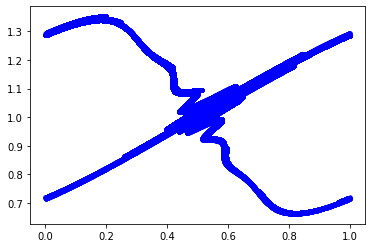

In [99]:
plt.figure()
for n in np.arange(num_iterations):    
    #plt.plot(x1_stable_array[:,n],x2_stable_array[:,n],'.',color='green',label="stable manif.")
    plt.plot(x1_unstable_array[:,n],x2_unstable_array[:,n],'.',color='blue',label="unstable manif.")
plt.show()

Look at the stable manifold

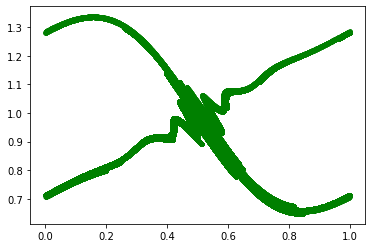

In [101]:
plt.figure()
for n in np.arange(num_iterations):    
    plt.plot(x1_stable_array[:,n],x2_stable_array[:,n],'.',color='green',label="stable manif.")
    #plt.plot(x1_unstable_array[:,n],x2_unstable_array[:,n],'.',color='blue',label="unstable manif.")
plt.show()

Look at the tangle

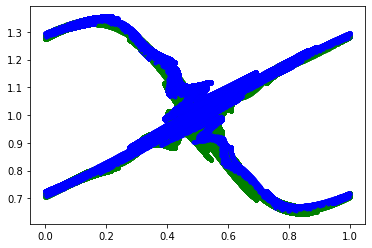

In [15]:
num_iterations=30
x1_stable_array=np.zeros([x1_ic_stable_list.shape[0],num_iterations])
x2_stable_array=np.zeros(x1_stable_array.shape)
x1_unstable_array=np.zeros([x1_ic_unstable_list.shape[0],num_iterations])
x2_unstable_array=np.zeros(x1_unstable_array.shape)

plt.figure()
for ic in np.arange(num_ics):
    x1_stable_array[ic,0]=x1_ic_stable_list[ic]
    x2_stable_array[ic,0]=x2_ic_stable_list[ic]
    x1_unstable_array[ic,0]=x1_ic_unstable_list[ic]
    x2_unstable_array[ic,0]=x2_ic_unstable_list[ic]
    
    for n in np.arange(num_iterations-1):    
        x1_stable_array[ic,n+1]=f_inv_fun(x1_stable_array[ic,n],x2_stable_array[ic,n])
        x2_stable_array[ic,n+1]=g_inv_fun(x1_stable_array[ic,n],x2_stable_array[ic,n])
        x1_unstable_array[ic,n+1]=f_fun(x1_unstable_array[ic,n],x2_unstable_array[ic,n])
        x2_unstable_array[ic,n+1]=g_fun(x1_unstable_array[ic,n],x2_unstable_array[ic,n])

for n in np.arange(num_iterations):    
    plt.plot(x1_stable_array[:,n],x2_stable_array[:,n],'.',color='green',label="stable manif.")
    plt.plot(x1_unstable_array[:,n],x2_unstable_array[:,n],'.',color='blue',label="unstable manif.")
plt.show()

Look at a particular trajectory

In [16]:
num_iterations=30
trajectoryIndex = 13;

trajectoryX = np.zeros(num_iterations)
trajectoryY = np.zeros(num_iterations)

trajectoryX[0] = x1_ic_unstable_list[trajectoryIndex];
trajectoryY[0] = x2_ic_unstable_list[trajectoryIndex];

for n in range(num_iterations-1):
    trajectoryX[n+1] = f_fun(trajectoryX[n],trajectoryY[n])
    trajectoryY[n+1] = g_fun(trajectoryX[n],trajectoryY[n])

In [20]:
print(trajectoryX[0],trajectoryY[0])

0.5000000650032501 1.000000040174218


In [17]:
num_iterations=30

x1_stable_array=np.zeros([x1_ic_stable_list.shape[0],num_iterations])
x2_stable_array=np.zeros(x1_stable_array.shape)
x1_unstable_array=np.zeros([x1_ic_unstable_list.shape[0],num_iterations])
x2_unstable_array=np.zeros(x1_unstable_array.shape)
    
for ic in np.arange(num_ics):
    x1_stable_array[ic,0]=x1_ic_stable_list[ic]
    x2_stable_array[ic,0]=x2_ic_stable_list[ic]
    x1_unstable_array[ic,0]=x1_ic_unstable_list[ic]
    x2_unstable_array[ic,0]=x2_ic_unstable_list[ic] 
    
    
    for n in np.arange(num_iterations-1):    
        x1_stable_array[ic,n+1]=f_inv_fun(x1_stable_array[ic,n],x2_stable_array[ic,n])
        x2_stable_array[ic,n+1]=g_inv_fun(x1_stable_array[ic,n],x2_stable_array[ic,n])        
        x1_unstable_array[ic,n+1]=f_fun(x1_unstable_array[ic,n],x2_unstable_array[ic,n])
        x2_unstable_array[ic,n+1]=g_fun(x1_unstable_array[ic,n],x2_unstable_array[ic,n])

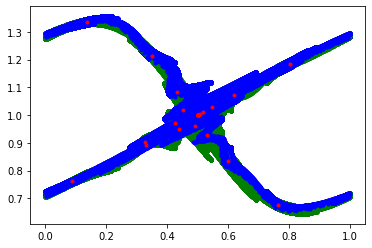

In [18]:
plt.figure() 
for n in np.arange(num_iterations):    
    plt.plot(x1_stable_array[:,n],x2_stable_array[:,n],'.',color='green',label="stable manif.")
    plt.plot(x1_unstable_array[:,n],x2_unstable_array[:,n],'.',color='blue',label="unstable manif.")
    
plt.plot(trajectoryX,trajectoryY,".",color="red",label="trajectory")
plt.show()